## Modell des Neurons

Zwei Personen sind entweder anwesend oder nicht. Die Anwesenheiten (Eingänge) der ersten Person wird mit $x_1 \in \{0, 1\}$ bezeichnet, die Anwesenheit der zweiten Person wird mit $x_2 \in \{0,1\}$ bezeichnet.

Die $\mathbf{Eingangsgewichte}$ sind $w_1 = 1$ und $w_2 = 1$. Sie lassen sich verstehen als eine bisherige relative Häufigkeit oder interpretiert als eine Wahrscheinlicht, mit der sich eine Person sich in einem bestimmten Zustand (der Anwesenheit) befindet.

Es ist zu entscheiden, wann einem Eingang welcher Wert zugeordnet wird. Dazu ist die Summe
$$
\Sigma = w_1 \cdot x_1 + w_2 \cdot x_2 = x_1 + x_2
$$
zu berechnen.

Betrachtet man die Situation des Beispiels, so ist ein gewünschter Zustand erreicht, wenn $\Sigma \geq 1=: \phi$ gilt. (Wobei $\phi$ unterschiedliche Werte annehmen kann, wie sich in den nächsten Beispielen zeigt.) Dazu bilden wir die Funktion $f$ über $\mathbb{R}$ mit
$$
f(\Sigma) = \left\{ \begin{array}{cl} 0 & \mbox{für } \Sigma < 1 \\ 1 & \mbox{für } \Sigma \geq 1 \end{array}\right.
$$
Trägt man die entsprechenden Werte in eine Tabelle ein, so ergibt sich:
$$
\begin{array}{c|c|c|c}
x_1 & x_2 & \Sigma & f(\Sigma)
\\
\hline
0 & 0 & 0 & 0
\\
0 & 1 & 1 & 1
\\
1 & 0 & 1 & 1
\\
1 & 1 & 2 & 1
\end{array}
$$
Nimmt man an, dass die Wahrscheinlichkeiten bestimmter Zustände $w_1 = \frac{2}{3}$ und $w_2 = \frac{1}{2}$ sind, gilt
$$
\Sigma = w_1 \cdot x_1 + w_2 \cdot x_2 = \frac{2}{3} \cdot x_1 + \frac{1}{2} \cdot x_2\, .
$$
Hierfür gilt:
$$
\begin{array}{c|c|c|c}
x_1 & x_2 & \Sigma & f(\Sigma)
\\
\hline
0 & 0 & 0 & 0
\\
0 & 1 & \frac{1}{2} & 0
\\
1 & 0 & \frac{2}{3} & 0
\\
1 & 1 & \frac{7}{6} & 1
\end{array}
$$
Bisher wurde die Schwelle der Veränderung von $f(\Sigma)$ auf $\phi=1$ gelegt, d.h. $f(\Sigma) = \left\{ \begin{array}{cl} 0 & \mbox{für } \Sigma < 1 \\ 1 & \mbox{für } \Sigma \geq 1 \end{array}\right.$. Die Ergebnisse verändern sich jedoch, wenn man den $\mathbf{Schwellenwert}$ $\phi$ anders legt. Setzt man beispielsweise $\phi = \frac{2}{3}$, so gilt für $f$ 
$$
f(\Sigma) = \left\{ \begin{array}{cl} 0 & \mbox{für } \Sigma < \phi = \frac{2}{3} \\ 1 & \mbox{für } \Sigma \geq \phi = \frac{2}{3}\end{array}\right.\, .
$$
Damit ergibt sich
$$
\begin{array}{c|c|c|c}
x_1 & x_2 & \Sigma & f(\Sigma)
\\
\hline
0 & 0 & 0 & 0
\\
0 & 1 & \frac{1}{2} & 0
\\
1 & 0 & \frac{2}{3} & 1
\\
1 & 1 & \frac{7}{6} & 1
\end{array}
$$
Mithilfe dieser Schwelle lässt sich das Ergebnis beeinflussen.

### Aufgabe 1
Durch Veränderungen in den unterschiedlichen Parametern verändern sich vereinzelt sprunghaft die Werte $f(\Sigma)$. Verändere in obigem Beispiel für den Fall des konstanten $\phi = \frac{2}{3}$ die Werte von $w_1$ und $w_2$. Interpretiere die Ergebnisse in Bezug auf die Anwesenheit von Personen an einem Ort.

In [2]:
def fkt(Sigma,phi):
    if Sigma > phi:
        return 1
    else:
        return 0

Es lassen sich Funktionswerte berechnen und ausgeben.

In [3]:
print(fkt(1,4/3))

0


Es lassen sich auch Funktionsgraphen zeichnen:

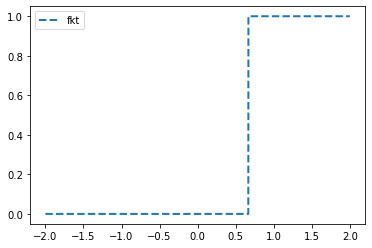

-1.9995999599959997
0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2, 2, 10000, endpoint=True)

Y = [fkt(i,2/3) for i in X]


#Jetzt folgt der Graph mit den Punkten
plt.plot(X, Y, linewidth=2, linestyle="dashed", label="fkt")
plt.legend()
plt.show()
print(X[1])
print(Y[1])

1. Zeichne Graphen der verschiedenen $\phi$ oben
2. Variiere die Variablen und Werte der Variablen, Funktionen oben. Notiere, welchen Einflüss Veränderungen haben.
3. Ergänze die Ausgabe des Graphen und die Ausgabe von $\Sigma$.

### Aufgabe 2
Im Graphen liegt mathematisch gesehen ein Fehler. Nenne und erkläre ihn.

## Definition des Neurons
Der Vorgang im Beispiel lässt sich durch ein $\mathbf{Neuron}$ darstellen:

$$
\begin{array}{ccccccc}
x_1 & \rightarrow & w_1 & 
\\
& & & \searrow & & &
\\
& & & & \Sigma = w_1 x_1 + w_2 x_2 & \rightarrow & a = f(\Sigma)
\\
& & & \nearrow & & &
\\
x_2 & \rightarrow & w_2 & & & &
\end{array}
$$

Hierbei bezeichnen:

1. $x_1, x_2$: $\mathbf{Eingänge}$ $\leadsto$ Es handelt sich um konkrete Eingabewerte.
2. $w_1, w_2$: $\mathbf{Eingangsgewichte}$ oder einfach $\mathbf{Gewichte}$ $\leadsto$ Diese Werte legen fest, wie stark jeder Eingabewert zu berücksichtigen ist.
3. $\Sigma$: Es handelt sich um die Summe der Produkte $x_i \cdot w_i$. Notiert man die $x_i$ und $w_i$ in Form liegender und stehender Vektoren, multipliziert sie mit einander und wendet die Summenschreibweise an, so ist
$$
\left( w_1 \quad w_2\right) \odot \left( {x_1 \atop x_2}\right) = \sum_{i=1}^2 x_i \cdot w_i\, .
$$
Zur Unterscheidung von der Multiplikation reeller Zahlen wurde hier die Multiplikation der Vektoren durch "$\odot$" notiert.

Diese Schreibweise lässt sich auf eine beliebige Anzahl von Eingängen und Eingangsgewichten übertragen:
$$
\left( w_1 \quad w_2 \quad \cdots \quad w_n \right) \odot \left( \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_n \end{array} \right) = \sum_{i=1}^n x_i \cdot w_i\, .
$$
Es handelt sich um die $\mathbf{gewichtete}\, \mathbf{Summe}$.
4. Zwischen den unterschiedlichen Ausgaben - hier 0 und 1 - ist eine Grenze zu setzen, der $\mathbf{Schwellenwert}$ $\phi$.
5. Die Ausgabe wird über die $\mathbf{Ausgabefunktion}$ oder $\mathbf{Aktivierungsfunktion}$ $f\colon\, \mathbb{R}\to \mathbb{R}$ geregelt. Für eine Stufenfunktion ist
$$
f (\Sigma) = \left\{ \begin{array}{cl}
0 & \mbox{ für } \Sigma < \phi\, ,
\\
1 & \mbox{ für } \Sigma \geq \phi\, .
\end{array}\right.
$$
Die Ausgabe wird öfter einfach als $a$ oder $a_{ist}$ bezeichnet.
6. In einem Verfahren werden Eingabewerte und Schwellenwerte so angepasst, dass ein bestimmtes Ergebnis eintritt.

### Aufgabe 3
Gib den Entwurf eines Neurons für die Beispiele aus Aufgabe 1 an.
Entwirf ein Neuron mit Python in den oben notierten Schritten. Definiere das Neuron dabei in Form einer Funktion.

#### Lösung von Aufgabe 3: Entwurf eines Neurons mit Python in einzelnen Schritten ####

Zunächst werden die Eingangsgewichte definiert.

In [5]:
w1 = 1
w2 = 1

Nun wird der Schwellenwert gesetzt.

In [6]:
phi = 0.4

Hier werden die Eingänge notiert. Beim späteren Rückgriff ist darauf zu achten, dass der Zähler bei 0 beginnt.

In [7]:
x1 = [0,1]
x2 = [0,1]

Hier folgt die Berechnung einzelner Varianten der gewichteten Summe $\Sigma$. Dabei wird auf einzelne Elemente der Tupel x1 und x2 zugegriffen.

In [8]:
x1[0]*w1 + x2[0]*w2

0

Es folgt die Liste der Berechnung aller Möglichkeiten von $\Sigma$ in diesem Beispiel. Die Tabelle besitzt die Struktur $x_1, x_2, \Sigma$ und den $f(\Sigma)$.

In [9]:
for i in [0,1]:
    for j in [0,1]:
        Sigma = x1[i]*w1 + x2[j]*w2
        if Sigma < phi:
            print(x1[i],x2[j],Sigma,0)
        else :
            print(x1[i],x2[j],Sigma,1)

0 0 0 0
0 1 1 1
1 0 1 1
1 1 2 1


#### Das Neuron in einer Funktion ####

Ein Neuron lässt sich unter Python in Form einer Funktion definieren. Die verschiedenen Größen sind Variablen der Funktion.

In [10]:
def neuron01( x1, x2, w1, w2, phi ):
    for i in [0,1]:
        for j in [0,1]:
            Sigma = x1[i]*w1 + x2[j]*w2
            if Sigma < phi:
                print(x1[i],x2[j],Sigma,0)
            else :
                print(x1[i],x2[j],Sigma,1)

Wir nehmen an, dass $x_1 = [0,\! 7;0,\! 25]$ und $x_2 = [0,\! 2; 0,\! 3]$ existierende Werte sind. Ferner legen wir $w_1=1,\! 0$ und $w_2=0,\! 8$ fest. Es soll $\phi = 1$ sein. Hiermit lässt sich $\Sigma$ berechnen:

In [11]:
x1 = [0.7,0.25]
x2 = [0.2,0.3]
w1 = 1.0
w2 = 0.8
phi = 1

Es folgt die Liste der Berechnung von $\Sigma$. Die Tabelle besitzt die Struktur $x_1, x_2, \Sigma$ und den $f(\Sigma)$.

In [12]:
neuron01(x1,x2,w1,w2,phi)

0.7 0.2 0.86 0
0.7 0.3 0.94 0
0.25 0.2 0.41000000000000003 0
0.25 0.3 0.49 0


## Lernverfahren

### Beispiel:
Eine Mixed-Volleyballmannschaft besteht aus drei Frauen (F) und vier Männern (M). Ihre Körpergrößen und ihre Gewichte sind in der folgenden Tabelle erkennbar:

<table style="width:60%">
    <tr>
        <th>Person</th>
        <th>Größe in cm</th>
        <th>Gewicht in kg</th>            
    </tr>
    <tr>
        <td>F1</td>
        <td>165</td>
        <td>50</td>
    </tr>
    <tr>
        <td>F2</td>
        <td>175</td>
        <td>50</td>
    </tr>
    <tr>
        <td>F3</td>
        <td>190</td>
        <td>70</td>
    </tr>
    <tr>
        <td>M1</td>
        <td>175</td>
        <td>70</td>
    </tr>
    <tr>
        <td>M2</td>
        <td>185</td>
        <td>80</td>
    </tr>
    <tr>
        <td>M3</td>
        <td>195</td>
        <td>100</td>
    </tr>
    <tr>
        <td>M4</td>
        <td>205</td>
        <td>100</td>
    </tr>
</table>

Um das Ganze etwas übersichtlicher zu machen, werden die Werte auf bestimmte Werte "skaliert". Dabei werden zur Skalierung "runde" Werte oberhalb der Höchstwerte gewählt. Bei der Größe wählen wir zur Skalierung 250 cm, beim Gewicht 200 kg. Die entsprechenden Werte werden als die Eingänge $x_1$ und $x_2$ gewählt. Damit ergibt sich die folgende Tabelle:

<table style="width:60%">
    <tr>
        <th>Person</th>
        <th>Größe in cm / 250 cm</th>
        <th>Gewicht in kg / 200 kg</th>            
    </tr>
    <tr>
        <td> </td>
        <td>$x_1$</td>
        <td>$x_2$</td>
    </tr>
    <tr>
        <td>F1</td>
        <td>0,66</td>
        <td>0,25</td>
    </tr>
    <tr>
        <td>F2</td>
        <td>0,70</td>
        <td>0,25</td>
    </tr>
    <tr>
        <td>F3</td>
        <td>0,76</td>
        <td>0,35</td>
    </tr>
    <tr>
        <td>M1</td>
        <td>0,70</td>
        <td>0,35</td>
    </tr>
    <tr>
        <td>M2</td>
        <td>0,74</td>
        <td>0,40</td>
    </tr>
    <tr>
        <td>M3</td>
        <td>0,78</td>
        <td>0,50</td>
    </tr>
    <tr>
        <td>M4</td>
        <td>0,82</td>
        <td>0,50</td>
    </tr>
</table>

Es soll analog zur Trennung von Raupen und Marienkäfern eine Unterscheidung zwischen Männern und Frauen der Mannschaft unter Bezug auf die Größe und das Gewicht der Person möglich gemacht werden, um die Anschaffung von Trikos und Trainigsmaterial planen zu können. Hierfür sind Tupel $(x_1,x_2)$ der Personen zu wählen. Wir sehen uns hier an, wie die zu den Tabellenwerten gehörenden Punkte im Koordinatensystem liegen.

Schritt 1:

Um ein Streudiagramm zeichnen zu können, ist ein Paket zu laden und die Möglichkeit zu schaffen, einen Plot anzuzeigen.

In [13]:
# Skatter-Plot (Streudiagramm)
import matplotlib.pyplot as plt
# Um einen Plot anzuzeigen
%matplotlib inline

Schritt 2:

Python Listen sind zur Anwendung in NumPy-Arrays umzuwandeln. Dazu ist ein Paket zu laden.

(Hinweis. Prinzipiell lässt sich unter NumPy auch mit Matrizen arbeiten. Bei arrays lässt sich jedoch einfacher mit einzelnen Elementen arbeiten, wie unten noch deutlich wird. Daher haben wir hier mit arrays gearbeitet.)

In [14]:
import numpy as np

Schritt 3:

Die $x_1$-Werte und die $x_2$-Werte sind jeweils in Arrays zu übertragen.

In [15]:
# Hier werden die x_1-Koordinaten definiert
x1 = np.array([0.66, 0.70, 0.76, 0.70, 0.74, 0.78, 0.82])
# Hier werden die x_2-Koordinaten definiert
x2 = np.array([0.25, 0.25, 0.35, 0.35, 0.40, 0.50, 0.50])

Schritt 4:

$(x_1[i]|x_2[i])$ mit Elementen $x_1[i]$ aus der Liste $x_1$ und Elementen $x_2[i]$ aus der Liste $x_2$ können als Punkte in einem Koordinatensystem betrachtet werden.

Um zwischen Spielerinnen und Spielern unterscheiden zu können, wird jedem Punkt eine Farbe zugewiesen.
Außerdem wird die Größe der Punkte definiert.

In [16]:
# Um sie zu unterscheiden, wird den Punkten eine Farbe zugeordnet
color = np.array(['black','black','black', 'red', 'red', 'red', 'red'])
# Die Größe der Punkte wird noch definiert
size = np.array([1, 1, 1, 1, 1, 1, 1])

Die Arrays lassen sich gemeinsam als eine Matrix verstehen, in deren Spalten die Parameter einer bestimmten Person gesammelt sind:
$$
\begin{array}{c}
\begin{array}{cccc}
x_1 & x_2 & color & size
\end{array}
\\
\left(\begin{array}{cccc}
0.66 & 0.25 & 'black' & 1
\\
0.70 & 0.25 & 'black' & 1
\\
\vdots & \vdots & \vdots & \vdots
\\
0.82 & 0.50 & 'red' & 1
\end{array}
\right)
\end{array}
$$

Schritt 5:

Diese Parameter lassen sich in einem Plot umsetzen.

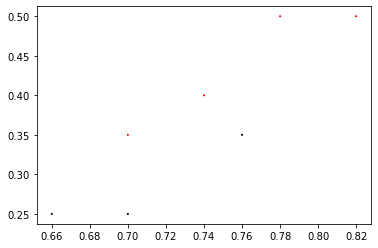

In [17]:
plt.scatter(x1, x2, c=color, s=size)

Schritt 6:

Zur Skalierung und der Übersicht halber werden Achsen ausgegeben.
Ferner werden ihre Achseneinstellungen gesetzt, von 0 bis 1 zu laufen.

([<matplotlib.axis.YTick at 0x20615aa61f0>,
 [Text(0, 0, ''), Text(0, 0, '')])

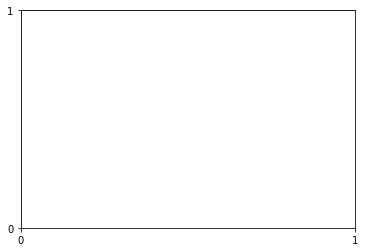

In [18]:
plt.grid(True)
plt.xticks([0.0,1.0])
plt.yticks([0.0,1.0])

Schritt 7:

Letztlich wird der Plot augegeben.

In [19]:
plt.show()

Zur Unterscheidung zwischen männlichen und weiblichen Spielern ist anschaulich betrachtet zwischen den Werten / im Graphen eine "Grenze" zu legen, so dass auf der einen Seite Markierungen von Frauen und auf der anderen Seite Markierungen von Männern liegen. Dem Tupel einer Frau soll eine 0, dem Tupel eines Manns eine 1 zugeordnet werden.

Wie lässt sich eine Grenze ziehen? Hierzu betrachten wir zunächst einmal die Gleichung
\begin{equation}
\Sigma' = (w_1 \quad w_2)\odot \left(\begin{array}{c} x_1 \\ x_2 \end{array}\right) = w_1 \cdot x_1 + w_2 \cdot x_2\, .
\end{equation}
Um die Schreibweise später zu vereinheitlichen und übersichtlicher zu machen, schreiben wir ab jetzt $\Sigma$ als
$$
\Sigma = w_1 \cdot x_1 + w_2\cdot x_2 - \phi = \Sigma'-\phi\, .
$$
Damit ist die Funktion $f$ in jedem Fall gegeben durch
$$
f(\Sigma) = \left\{ \begin{array}{cl} 0 & \mbox{für } \Sigma < 0 \\ 1 & \mbox{für } \Sigma \geq 0 \end{array}\right. ,
$$
Bringt man $\Sigma$ auf die andere Seite, so wird klar, dass es sich um Geradengleichung handelt. Eine Gerade separiert zwei Halbebenen im $\mathbb{R}^2$ von einander. Die Ausgabe des Neurons zeigt an, in welcher Halbebene der Punkt $(x_1,x_2)$ liegt. Die Fragestellung lässt sich also graphisch betrachet so verstehen, dass eine Gerade die Punkte von Frauen und Männern von einander trennt.

Betrachten wir die Zuordnungsvorschrift $f$ mit
$$
f(\Sigma) = \left\{ \begin{array}{cl} 0 & \mbox{für } \Sigma < 0 \\ 1 & \mbox{für } \Sigma \geq 0 \end{array}\right. ,
$$
so zeigt es an, dass genau die Gerade zur Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = \phi$ mit dem Schwellenwert $\phi$ betrachtet werden sollte. Hierbei ist $\phi$ als weitere Variable zu verstehen.         

Um eine Möglichkeit zu bekommen, die Gerade zu zeichnen, definieren wir sie als Funktion. Dies bedeutet, dass wir obige Gleichung nach $x_2$ auflösen:
\begin{eqnarray}
w_1 \cdot x_1 + w_2 \cdot x_2 &=& \phi
\\
\iff w_2 \cdot x_2 &=& - w_1 \cdot x_1+ \phi
\\
\iff x_2 &=& - \frac{w_1}{w_2} \cdot x_1 + \frac{\phi}{w_2}
\end{eqnarray}
Die Zeichnung einer solchen Gerade lässt sich mit Python umsetzen. Hierzu ergänzen wir das letzte Programm.

Die ersten Schritte verlaufen analog zu oben:

([<matplotlib.axis.YTick at 0x20615aed160>,
 [Text(0, 0, ''), Text(0, 0, '')])

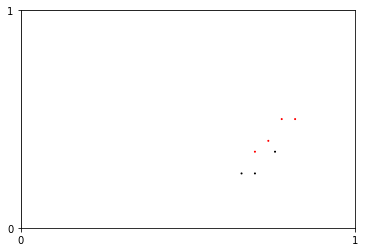

In [20]:
# Skatter-Plot (Streudiagramm)
import matplotlib.pyplot as plt
# Um einen Plot anzuzeigen
%matplotlib inline

import numpy as np
#import atplotlib
# Python Listen sind in NumPy-Arrays umzuwandeln, um eine Anwendung möglich zu machen

# Hier werden die x_1-Koordinaten definiert
x1 = np.array([0.66, 0.70, 0.76, 0.70, 0.74, 0.78, 0.82])
# Hier werden die x_2-Koordinaten definiert
x2 = np.array([0.25, 0.25, 0.35, 0.35, 0.40, 0.50, 0.50])
# Um sie zu unterscheiden, wird den Punkten eine Farbe zugeordnet
color = np.array(['black','black','black', 'red', 'red', 'red', 'red'])
# Die Größe der Punkte wird noch definiert
size = np.array([1, 1, 1, 1, 1, 1, 1])

#Achsen werden ausgegeben
plt.grid(True)

# Diese Paraymeter werden in einem Plot umgesetzt
plt.scatter(x1, x2, c=color, s=size)

# Achseneinstellungen setzen
plt.xticks([0.0,1.0])
plt.yticks([0.0,1.0])

Hier folgen den Schritten 1 bis 7 von oben noch folgende Schritte:

Schritt 8:

Definition der Eingangsgewichte $w_1$ und $w_2$ für das Netz.

In [21]:
w11 = -1.0
w21 = 0.8

Schritt 9:

Definition des Schwellenwerts $\phi$

In [22]:
phi = 0.4

Schritt 10:

Der folgende Befehl definiert ein array von 0 bis 1, das aus zwei Werten besteht. (Bei mehr als zwei geforderten Werten sind diese auf das Intervall gleichverteilt.)

Diese Liste wird anschließend ausgegeben.

In [23]:
xListe = np.linspace (0.0,1.0,2)
print(xListe)

[0. 1.]


Schritt 11:

Hier wird ein $\Lambda$-Operator definiert. Er dient zur Definition von Operatoren mehrerer Variablen.

Anschließend werden vier Variablen festgelegt: $x, \phi, w_1, w_2$

Hinter dem Doppelpunkt steht die Operation, durch die diese Werte miteinander verknüpft sind.

Es handelt es sich um den Term der linearen Separation der Klassen, der damit eine Gerade beschreibt.

In [24]:
xLine = lambda x,phi,w1,w2: -w1/w2*x - phi/w2

Schritt 12:

In den $\Lambda$-Operator von oben werden für $w_0$, $w_1$ und $w_2$ die zuvor definierten Werte $w_{01}, w_{11}, w_{21}$ eingesetzt.

Für $x$ wird jeder Wert der $\mathtt{xListe}$ eingesetzt. Dies führt hier zu einer Liste von zwei Elementen.

Durch die zur $\mathtt{xLine}$ gehörenden Punkte wird durch $\mathtt{plot}$ eine Gerade gezogen.

$\mathbf{Achtung!}$ Für den Graph werden immer die $x$-Werte 0 und 1 genommen, ganz egal, was für die $\mathtt{xListe}$ gewählt wurde!

[-0.5   0.75]


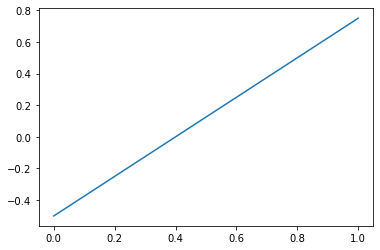

In [25]:
print(xLine(xListe,phi,w11,w21))
plt.plot(xLine(xListe,phi,w11,w21))

Schritt 13:

Letztlich wird der Plot ausgegeben. Alles zusammen sieht folgendermaßen aus:

[0. 1.]
[-0.5   0.75]


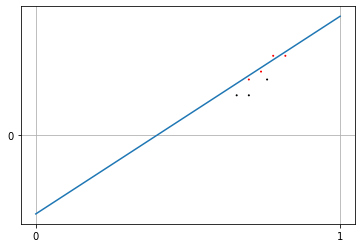

In [26]:
# Skatter-Plot (Streudiagramm)
import matplotlib.pyplot as plt
# Um einen Plot anzuzeigen
%matplotlib inline

import numpy as np
#import atplotlib
# Python Listen sind in NumPy-Arrays umzuwandeln, um eine Anwendung möglich zu machen

# Hier werden die x_1-Koordinaten definiert
x1 = np.array([0.66, 0.70, 0.76, 0.70, 0.74, 0.78, 0.82])
# Hier werden die x_2-Koordinaten definiert
x2 = np.array([0.25, 0.25, 0.35, 0.35, 0.40, 0.50, 0.50])
# Um sie zu unterscheiden, wird den Punkten eine Farbe zugeordnet
color = np.array(['black','black','black', 'red', 'red', 'red', 'red'])
# Die Größe der Punkte wird noch definiert
size = np.array([1, 1, 1, 1, 1, 1, 1])

#Achsen werden ausgegeben
plt.grid(True)

# Diese Paraymeter werden in einem Plot umgesetzt
plt.scatter(x1, x2, c=color, s=size)

# Achseneinstellungen setzen
plt.xticks([0.0,1.0])
plt.yticks([0.0,1.0])

w11 = -1.0
w21 = 0.8

phi = 0.4

xListe = np.linspace (0.0,1.0,2)
print(xListe)

xLine = lambda x,phi,w1,w2: -w1/w2*x - phi/w2

print(xLine(xListe,phi,w11,w21))
plt.plot(xLine(xListe,phi,w11,w21))

plt.show()

Wie sich an dem Ergebnis zeigt, ist der Verlauf der Gerade abhängig von $w_1, w_2$ und $\phi$. Die Eingangsgewichte und der Schwellenwert sind also sinnvoll zu wählen, um das Ziel zu erreichen, die Daten mithilfe der zugehörigen Gerade in zwei Klassen zu unterteilen und die Zugehörigkeit von Daten (auch für weitere Daten) möglich zu machen.

Übertragen auf die Erklärung weiter oben heißt dies, dass ein Schwellenwert zu finden ist, so dass die zugehörige Gerade so zwischen den Punkten $(x_1,x_2)$ verläuft, dass auf ihrer einen Seite zu Frauen gehörende Punkte und auf der anderen Seite zu Männern gehörende Punkte liegen.

### Aufgabe 4
Das folgende Programm ist identisch mit dem Programm oben. Verändere $w_1, w_2$ und $\phi$ so, dass die Trennungsgerade ihren Zweck erfüllt.

[0. 1.]
[-0.5   0.75]


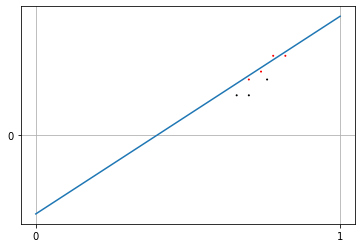

In [27]:
# Skatter-Plot (Streudiagramm)
import matplotlib.pyplot as plt
# Um einen Plot anzuzeigen
%matplotlib inline

import numpy as np
#import atplotlib
# Python Listen sind in NumPy-Arrays umzuwandeln, um eine Anwendung möglich zu machen

# Hier werden die x_1-Koordinaten definiert
x1 = np.array([0.66, 0.70, 0.76, 0.70, 0.74, 0.78, 0.82])
# Hier werden die x_2-Koordinaten definiert
x2 = np.array([0.25, 0.25, 0.35, 0.35, 0.40, 0.50, 0.50])
# Um sie zu unterscheiden, wird den Punkten eine Farbe zugeordnet
color = np.array(['black','black','black', 'red', 'red', 'red', 'red'])
# Die Größe der Punkte wird noch definiert
size = np.array([1, 1, 1, 1, 1, 1, 1])

#Achsen werden ausgegeben
plt.grid(True)

# Diese Paraymeter werden in einem Plot umgesetzt
plt.scatter(x1, x2, c=color, s=size)

# Achseneinstellungen setzen
plt.xticks([0.0,1.0])
plt.yticks([0.0,1.0])

w11 = -1.0
w21 = 0.8

phi = 0.4

xListe = np.linspace (0.0,1.0,2)
print(xListe)

xLine = lambda x,phi,w1,w2: -w1/w2*x - phi/w2

print(xLine(xListe,phi,w11,w21))
plt.plot(xLine(xListe,phi,w11,w21))

plt.show()

An dieser Stelle werden zwei Dinge deutlich:
 
1. Die Lösung ist nicht unbedingt eindeutig. Unter Umständen gibt es für den Verlauf der Gerade zwischen den Punkten mehrere Lösungen. Ferner ist es evtl. nicht notwendig oder auch nicht möglich, eine Gerade zu finden, die die Bedingungen erfüllt.
2. Es wird womöglich nicht unmittelbar passende Parameter für eine Grenze gewählt. Es werden mehrere Schritte benörigt.

Hier stellt sich die Frage, ob es nicht ein Verfahren gibt, mit der sich eine mögliche Lösung bestimmen lässt.
Es wäre schön, wenn es einen Algorithmus gäbe, der durch mehrfache Hintereinanderausführung zum Ziel führt, da man diesen Algorithmus an den Computer geben kann. Welche Bedingungen stelle ich also an $\phi$? Wie finde ich das "richtige" $\phi$?

Diese Fragen werden weiter unten beantwortet.

### Aufgabe 5
Zeichne ein Flussdiagramm zu obiger Tabelle.